In [4]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
import kagglehub
path = kagglehub.dataset_download("kannanaikkal/food-demand-forecasting")

print("Path to dataset files:", path)

train_data = pd.read_csv(os.path.join(path, 'train.csv'), index_col=0)
test_data = pd.read_csv(os.path.join(path, 'test.csv'), index_col=0)

train_data.head()

Path to dataset files: C:\Users\renat\.cache\kagglehub\datasets\kannanaikkal\food-demand-forecasting\versions\1


,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
id,,,,,,,,
1379560,1,55,1885,136.83,152.29,0,0,177
1466964,1,55,1993,136.83,135.83,0,0,270
1346989,1,55,2539,134.86,135.86,0,0,189
1338232,1,55,2139,339.50,437.53,0,0,54
1448490,1,55,2631,243.50,242.50,0,0,40


In [6]:
train_data.tail() # tail() -> corresponds for checking the last 5 values of the table

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
id,,,,,,,,
1271326,145,61,1543,484.09,484.09,0,0,68
1062036,145,61,2304,482.09,482.09,0,0,42
1110849,145,61,2664,237.68,321.07,0,0,501
1147725,145,61,2569,243.50,313.34,0,0,729
1361984,145,61,2490,292.03,290.03,0,0,162


In [7]:
train_data.shape

(456548, 8)

In [8]:
test_data.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
id,,,,,,,
1028232,146,55,1885,158.11,159.11,0,0
1127204,146,55,1993,160.11,159.11,0,0
1212707,146,55,2539,157.14,159.14,0,0
1082698,146,55,2631,162.02,162.02,0,0
1400926,146,55,1248,163.93,163.93,0,0


In [9]:
meal_info_df = pd.read_csv(os.path.join(path, "meal_info.csv"), index_col=0)
meal_info_df = meal_info_df.reset_index(drop=False)
meal_info_df.tail()

,meal_id,category,cuisine
46,2956,Fish,Continental
47,2104,Fish,Continental
48,2444,Seafood,Continental
49,2867,Seafood,Continental
50,1445,Seafood,Continental


In [10]:
meal_info_df[['category', 'meal_id']].groupby(['category']).count()

,meal_id
category,
Beverages,12
Biryani,3
Desert,3
Extras,3
Fish,3
Other Snacks,3
Pasta,3
Pizza,3
Rice Bowl,3


In [11]:
train_data = train_data.merge(meal_info_df, on='meal_id', how='left') # how -> corresponds for the values that we take as a main ones while forming a table
# in case some of the columns already exist in left table from the right they're getting deleted (train_data(left table), meal_info_df(right table))
# how = 'inner'-> will create the table of common values between two selected tables (like INNER JOIN in SQL)

In [12]:
train_data[['category', 'meal_id']].groupby(['category']).count().sort_values(by='meal_id', ascending = False)

,meal_id
category,
Beverages,127890
Rice Bowl,33408
Sandwich,33291
Pizza,33138
Starters,29941
Other Snacks,29379
Desert,29294
Salad,28559
Pasta,27694


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   week                   456548 non-null  int64  
 1   center_id              456548 non-null  int64  
 2   meal_id                456548 non-null  int64  
 3   checkout_price         456548 non-null  float64
 4   base_price             456548 non-null  float64
 5   emailer_for_promotion  456548 non-null  int64  
 6   homepage_featured      456548 non-null  int64  
 7   num_orders             456548 non-null  int64  
 8   category               456548 non-null  object 
 9   cuisine                456548 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 34.8+ MB


In [14]:
for i in range(146):
    slice = train_data[train_data['week']==i]
    length = len(slice)
    unique_ids = len(slice['meal_id'].unique())
    if length != unique_ids:
        print(f"Week {i} has more than one entry per meal_id. {length=}, {unique_ids=}")

Week 1 has more than one entry per meal_id. length=2922, unique_ids=45
Week 2 has more than one entry per meal_id. length=2896, unique_ids=45
Week 3 has more than one entry per meal_id. length=2899, unique_ids=45
Week 4 has more than one entry per meal_id. length=2889, unique_ids=45
Week 5 has more than one entry per meal_id. length=2859, unique_ids=45
Week 6 has more than one entry per meal_id. length=2846, unique_ids=45
Week 7 has more than one entry per meal_id. length=2795, unique_ids=45
Week 8 has more than one entry per meal_id. length=2786, unique_ids=45
Week 9 has more than one entry per meal_id. length=2854, unique_ids=45
Week 10 has more than one entry per meal_id. length=2859, unique_ids=47
Week 11 has more than one entry per meal_id. length=2863, unique_ids=45
Week 12 has more than one entry per meal_id. length=2831, unique_ids=45
Week 13 has more than one entry per meal_id. length=2838, unique_ids=45
Week 14 has more than one entry per meal_id. length=2830, unique_ids=46
W

In [15]:
train_data[train_data['week']==1][['meal_id', 'center_id', 'week']].groupby(['meal_id', 'center_id']).count()

week
meal_id center_id      
1062    10            1
        11            1
        13            1
        14            1
        17            1
...                 ...
2867    145           1
        146           1
        152           1
        153           1
        174           1

[2922 rows x 1 columns]

In [16]:
any(train_data[train_data['week']==1][['meal_id', 'center_id', 'week']].groupby(['meal_id', 'center_id']).count()['week'] > 1)

False

In [17]:
for i in range(146):
    slice = train_data[train_data['week']==i]
    more_than_one = any(train_data[train_data['week']==1][['meal_id', 'center_id', 'week']].groupby(['meal_id', 'center_id']).count()['week'] > 1)
    if more_than_one:
        print(f"Week {i} has more than one entry per meal_id.")

In [18]:
# train-test-split manually 
df = train_data[:]
test_data = df[df['week'] == 145]
train_data = df[df['week'] != 145]

In [19]:
len(test_data)

3268

In [20]:
from sklearn.model_selection import train_test_split

df1, df2 = train_test_split(df, shuffle=False, test_size=len(test_data))
df1.tail()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
453275,144,61,1543,483.09,483.09,0,0,123,Desert,Indian
453276,144,61,2304,483.09,483.09,0,0,13,Desert,Indian
453277,144,61,2664,243.47,321.07,1,0,770,Salad,Italian
453278,144,61,2569,246.41,314.34,1,0,811,Salad,Italian
453279,144,61,2490,290.03,292.03,0,0,190,Salad,Italian


In [21]:
df2.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
453280,145,55,1885,156.23,156.23,0,0,121,Beverages,Thai
453281,145,55,1993,159.14,158.14,0,0,54,Beverages,Thai
453282,145,55,2539,158.11,160.11,0,0,135,Beverages,Thai
453283,145,55,2139,292.03,292.03,0,0,15,Beverages,Indian
453284,145,55,2631,165.93,165.93,0,0,96,Beverages,Indian


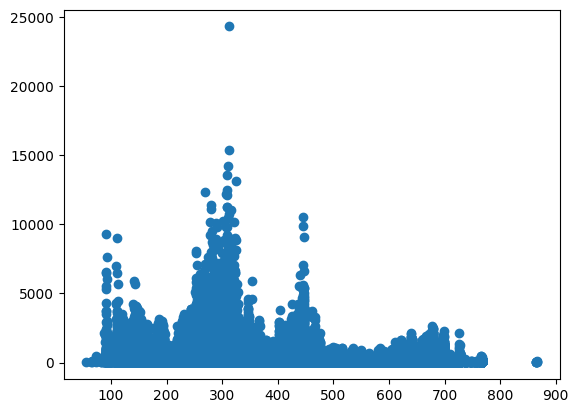

In [22]:
plt.scatter(train_data['base_price'], train_data['num_orders'])

<Axes: xlabel='base_price', ylabel='num_orders'>

C:\Users\renat\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


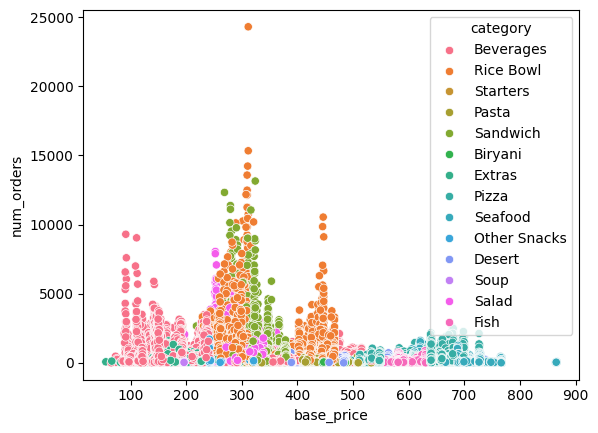

In [23]:
sns.scatterplot(x = 'base_price', y ='num_orders', hue='category', data=train_data)

<Axes: xlabel='base_price', ylabel='num_orders'>

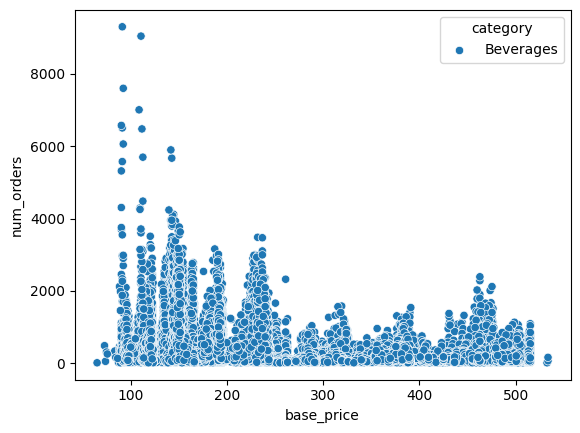

In [24]:
sns.scatterplot(x = 'base_price', y ='num_orders', hue='category', data=train_data[train_data['category']=='Beverages'])

In [25]:
train_data_beverages = train_data[train_data['category'] == 'Beverages']
test_data_beverages = test_data[test_data['category'] == 'Beverages']

In [26]:
from sklearn.linear_model import LinearRegression

x = train_data_beverages['base_price'].to_numpy().reshape(-1,1)
y = train_data_beverages['num_orders'].to_numpy()

model = LinearRegression().fit(x, y)

In [27]:
x

array([[152.29],
       [135.83],
       [135.86],
       ...,
       [367.63],
       [369.63],
       [355.99]], shape=(126993, 1))

In [28]:
y

array([177, 270, 189, ...,  96, 136,  69], shape=(126993,))

In [29]:
model.__dict__ 

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([-0.96807654]),
 'rank_': 1,
 'singular_': array([36934.4513233]),
 'intercept_': np.float64(536.5377173336873)}

In [30]:
train_data_beverages['predictions'] = model.predict(x)

C:\Users\renat\AppData\Local\Temp\ipykernel_64280\3957548968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_beverages['predictions'] = model.predict(x)


In [31]:
train_data_beverages

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,predictions
0,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,389.109340
1,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,405.043880
2,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,405.014838
3,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,112.975187
4,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,301.779155
...,...,...,...,...,...,...,...,...,...,...,...
453245,144,61,1062,153.26,155.26,0,0,472,Beverages,Italian,386.234153
453246,144,61,2707,203.76,235.74,0,0,392,Beverages,Italian,308.323353
453247,144,61,1207,368.63,367.63,0,0,96,Beverages,Continental,180.643737
453248,144,61,1230,368.63,369.63,0,0,136,Beverages,Continental,178.707584


<Axes: xlabel='base_price', ylabel='num_orders'>

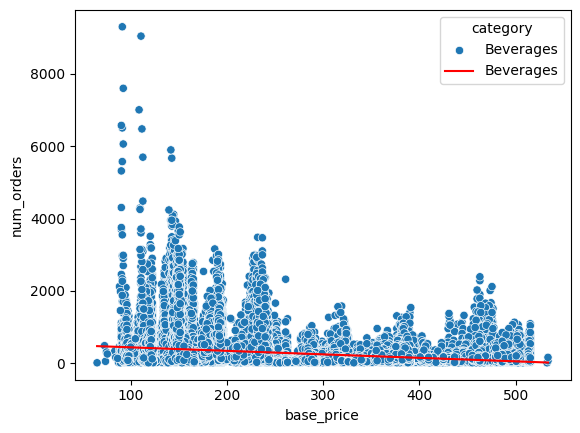

In [32]:
sns.scatterplot(x='base_price', y='num_orders', hue='category', data=train_data_beverages)
sns.lineplot(data=train_data_beverages, x= 'base_price', y='predictions', hue='category', palette=['red'])

<Axes: xlabel='base_price', ylabel='num_orders'>

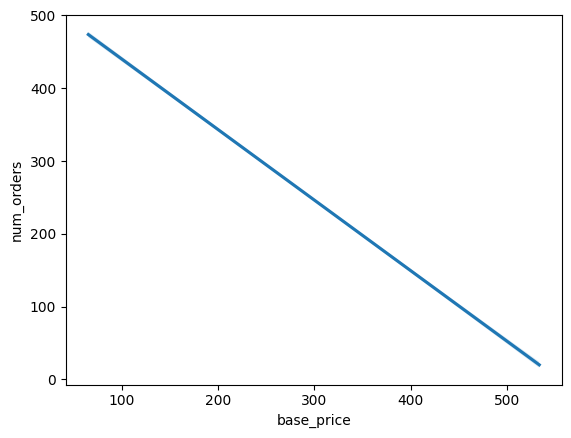

In [33]:
# another way to build a linear regression type of model
sns.regplot(data=train_data_beverages, x = 'base_price', y ='num_orders', scatter=False)

In [34]:
# Estimation of the quality of the model
# MSE
from sklearn.metrics import mean_squared_error, r2_score

# mean_squared_error = np.sum((y -y_hat.T)**2) / len(y)

test_data_beverages['predictions'] = model.predict(test_data_beverages['base_price'].to_numpy().reshape(-1,1))

print("Mean square error: %.2f" % mean_squared_error(test_data_beverages['num_orders'], test_data_beverages['predictions']))
# Coefficient of determination shows how well our model describes the data (variance) -> 1 is a perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_data_beverages['num_orders'], test_data_beverages['predictions']))

Mean square error: 96257.36
Coefficient of determination: 0.02


C:\Users\renat\AppData\Local\Temp\ipykernel_64280\1262841084.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_beverages['predictions'] = model.predict(test_data_beverages['base_price'].to_numpy().reshape(-1,1))


In [35]:
x_f = np.array([[1], [2], [3]])
y_f = np.array([1, 2, 3])

model_f = LinearRegression().fit(x_f, y_f)
model_f.coef_ = np.array([1.0])
model_f.intercept_ = np.array([0.0])

In [36]:
model_f.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([1.]),
 'rank_': 1,
 'singular_': array([1.41421356]),
 'intercept_': array([0.])}

In [37]:
x_f = np.array([[1],[2],[3]])
y_hat = model_f.intercept_ + x_f*model_f.coef_

In [38]:
y_hat

array([[1.],
       [2.],
       [3.]])

In [39]:
mean_squared_error_manual = np.sum((y_f -y_hat.T)**2) / len(y_f)
mean_squared_error_manual

np.float64(0.0)

<Axes: xlabel='base_price', ylabel='num_orders'>

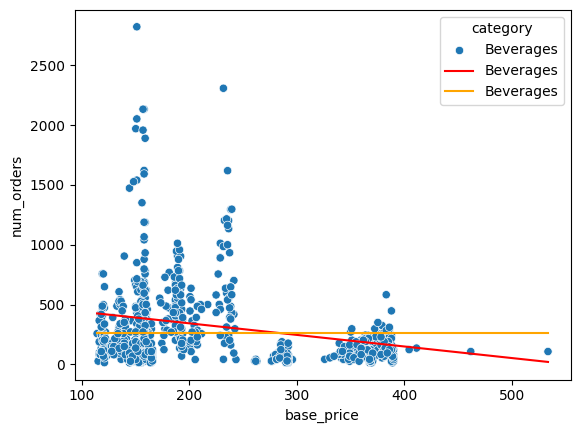

In [40]:
sns.scatterplot(x='base_price', y='num_orders', hue='category', data=test_data_beverages)
sns.lineplot(data=test_data_beverages, x= 'base_price', y='predictions', hue='category', palette=['red'])
sns.lineplot(data=test_data_beverages, x= 'base_price', y=test_data_beverages['num_orders'].mean(), hue='category', palette=['orange'])

In [41]:
mean = np.full(len(test_data_beverages['num_orders']), test_data_beverages['num_orders'].mean())
mean_squared_error(test_data_beverages['num_orders'],mean)

97973.8176033328

In [42]:
from copy import deepcopy

model_copy = deepcopy(model)
model_copy.coef_

array([-0.96807654])

In [43]:
model_copy.coef_ = np.array([-0.99])

train_predictions_sample = train_data_beverages[['base_price', 'num_orders']]
train_predictions_sample['exp_best'] = train_data_beverages['predictions']
train_predictions_sample['exp_0'] = model_copy.predict(x)

C:\Users\renat\AppData\Local\Temp\ipykernel_64280\1250232807.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_predictions_sample['exp_best'] = train_data_beverages['predictions']
C:\Users\renat\AppData\Local\Temp\ipykernel_64280\1250232807.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_predictions_sample['exp_0'] = model_copy.predict(x)


In [44]:
train_predictions_sample

,base_price,num_orders,exp_best,exp_0
0,152.29,177,389.109340,385.770617
1,135.83,270,405.043880,402.066017
2,135.86,189,405.014838,402.036317
3,437.53,54,112.975187,103.383017
4,242.50,40,301.779155,296.462717
...,...,...,...,...
453245,155.26,472,386.234153,382.830317
453246,235.74,392,308.323353,303.155117
453247,367.63,96,180.643737,172.584017
453248,369.63,136,178.707584,170.604017
